Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Batsal Ghimire"
COLLABORATORS = ""

---

# CS110 Pre-class Work 6.2

## Part A. Median-of-3 partitioning quicksort 

## Question 1.

Read through the following Python code. What does each function (i.e., median, qsort, randomized_qsort, test_qsort) do? Comment in details each function. 


In [2]:
#Import packages
import timeit
import random

eps = 1e-16
N = 10000
locations = [0.0, 0.5, 1.0 - eps]


def median(x1, x2, x3): #We get the median number using the three numbers that are passed as arguments
    #Compares the three elements and returns their median value.
    if (x1 < x2 < x3) or (x3 < x2 < x1):
        return x2
    elif (x1 < x3 < x2) or (x2 < x3 < x1):
        return x3
    else:
        return x1

def qsort(lst): #Sorts the list set as an argument
    #Creates a tuple with the given values
    indices = [(0, len(lst))] #The first element is the initial index and the second one is the length of the list.

    while indices:
        (frm, to) = indices.pop() #The elements from the indeces are popped and its value is set to frm and to
        if frm == to: #If the two value are the same, or the number of elements is one
            continue

        # Find the partition:
        N = to - frm #Finds the number of elements in the list
        inds = [frm + int(N * n) for n in locations] #Locations has three elements, so we get a list of three elements representing the indices.
        values = [lst[ind] for ind in inds] #Get the indices and outputs the first, mid and last elements
        partition = median(*values) #Finds the median using the values that we obtained.

        # Split into lists:
        #We split the elements based  on whether the element is smaller than or greater than the pivot element.
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition]) #Counts the number of elements equal to the pivot
        
        #We get the index with which we can replace the elements with the ones that are sorted
        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst


def randomized_quicksort():
    lst = [i for i in range(N)] #Creates a list based on the parameters provided i.e. N elements
    random.shuffle(lst) #Randomizes the list 'lst'
    return qsort(lst) #Calls the qsort function with the random list


def test_quicksort(): #Test function to check if the list is sorted
    lst = randomized_quicksort()
    assert (lst == [i for i in range(N)])


# Is our algorithm correct
test_quicksort()

# How fast is our algorithm
print(timeit.timeit(randomized_quicksort, number=1))

0.08387009999999995


## Question 2.

What are the main differences between the `randomized_quicksort` in the code and $RANDOMIZED-QUICKSORT$ in Cormen et al., besides that the partition of `randomized_quicksort` uses a median of 3 as a pivot?

The RANDOMIZED-QUICKSORT from Cormen uses recursion on each of the sublists that we obtain through partitioning. On the code given above, the function randomly shuffles the list and calls on another function using while loop to sort the list.

## Question 3.
What is the time complexity of this `randomized_qsort`? Time the algorithm on lists of various lengths, each list being a list of the first $n$ consecutive positive integers. Produce a graph with list lengths on the x axis and running time on the y axis. As always, don’t forget to time the algorithm several times for each list’s length and then average the results. 

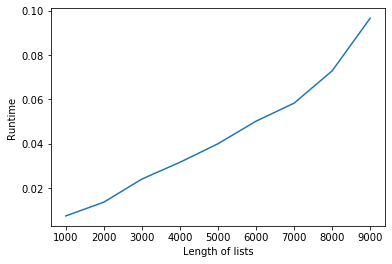

In [11]:
import timeit
import matplotlib.pyplot as plt
num_of_runs = 20 #Number of times we run the algorithm to find the average value
lst = [] #List that holds the elements that needs to be sorted
avg_tm = [] #Average time that we obtain from the algorithm
for no in range(1,10): #Helps to increase the size of the list on every run
    N = 1000*no #Sets the number of elements of the list
    lst.append(N) #List of number of elements in the list
    tm = 0 #start time at 0
    for i in range(num_of_runs): 
        tm = tm + timeit.timeit(randomized_quicksort, number = 1) #Fetches the time taken to sort the algotithm
    avg_tm.append(tm/num_of_runs) #Finds the average time for different sizes of the list
plt.plot(lst, avg_tm) #Plots the 
plt.xlabel("Length of lists")
plt.ylabel("Runtime")
plt.show()

## Question 4.

### Question 4a.

Change the `qsort()` function in a way that you **don’t** separate the items that are equal to the partition. 


In [12]:
#Most of the function is the same. The only difference is we assume that the elements of the list do not repeat.
def qsort(lst):
    indices = [(0, len(lst))]

    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = median(*values)

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        lower.append(partition)
        
        ind1 = frm + len(lower)

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1-1))
        indices.append((ind1, to))
    return lst

In [13]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 4b.

Now time the algorithm on the same inputs you have used in question 3, adding one more line in the previous graph you have produced. 

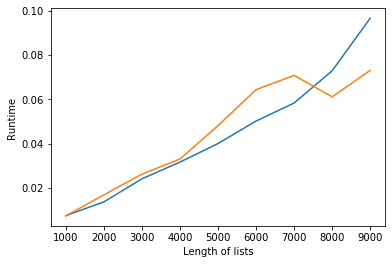

In [14]:
#Plot the two different implementation's runtime.
import timeit
import matplotlib.pyplot as plt
num_of_runs = 20
lst = []
avg_tm_c = []
for no in range(1,10):
    N = 1000*no
    lst.append(N)
    tm = 0
    for i in range(num_of_runs):
        tm = tm + timeit.timeit(randomized_quicksort, number = 1)
    avg_tm_c.append(tm/num_of_runs)
plt.plot(lst, avg_tm)
plt.plot(lst, avg_tm_c)
plt.xlabel("Length of lists")
plt.ylabel("Runtime")
plt.show()

## Question 5.

### Question 5a.

Remove the median-of-3 partitioning, and just use the first element in the array. 

In [15]:
def qsort(lst): #Sorts the list set as an argument
    #Creates a tuple with the given values
    indices = [(0, len(lst))] #The first element is the initial index and the second one is the length of the list.

    while indices:
        (frm, to) = indices.pop() #The elements from the indeces are popped and its value is set to frm and to
        if frm == to: #If the two value are the same, or the number of elements is one
            continue

        # Find the partition:
        N = to - frm #Finds the number of elements in the list
        inds = [frm + int(N * n) for n in locations] #Locations has three elements, so we get a list of three elements representing the indices.
        values = [lst[ind] for ind in inds] #Get the indices and outputs the first, mid and last elements
        partition = lst[frm] #Uses the first element as the pivot

        # Split into lists:
        #We split the elements based  on whether the element is smaller than or greater than the pivot element.
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition]) #Counts the number of elements equal to the pivot
        
        #We get the index with which we can replace the elements with the ones that are sorted
        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst

In [16]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 5b.

Does this change the running time of your algorithm? Justify your response with a graph. 



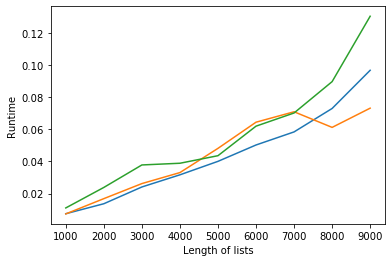

In [17]:
import timeit
import matplotlib.pyplot as plt
num_of_runs = 20
lst = []
avg_tm_nm = []
for no in range(1,10):
    N = 1000*no
    lst.append(N)
    tm = 0
    for i in range(num_of_runs):
        tm = tm + timeit.timeit(randomized_quicksort, number = 1)
    avg_tm_nm.append(tm/num_of_runs)
plt.plot(lst, avg_tm)
plt.plot(lst, avg_tm_c)
plt.plot(lst, avg_tm_nm)
plt.xlabel("Length of lists")
plt.ylabel("Runtime")
plt.show()

## Part B. Recursive quicksort. 

One main difference between the quicksort algorithms in Cormen et al. and the implementation in the code above is that quick sort (in the code in this notebook) is not recursive, while $QUICKSORT$ in Cormen et al. is. Given the limitation of Python so that it can only make 500 recursive calls, estimate the maximum size of the list that can be sorted by Python if a recursive quicksort is to be used. Explicitly state all assumptions you make in getting to an answer.


Python supports 500 recursive calls. So, if we look at the binary tree, we can say that the maximum number of recursions should be $2^n$<500 recursions. If n is greater than 9, then the recursions limit would be exceeded. Hence, the maximum size of the list is $2^9$.